In [24]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = r'../data/Superstore.xls'
df = pd.read_excel(file)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
furniture = df[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
        'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [5]:
furniture.drop(cols, axis=1, inplace=True)
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [6]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [7]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index().set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [8]:
y = furniture.resample('MS').mean()  # 按月进行重采样,按月初S-start
y

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


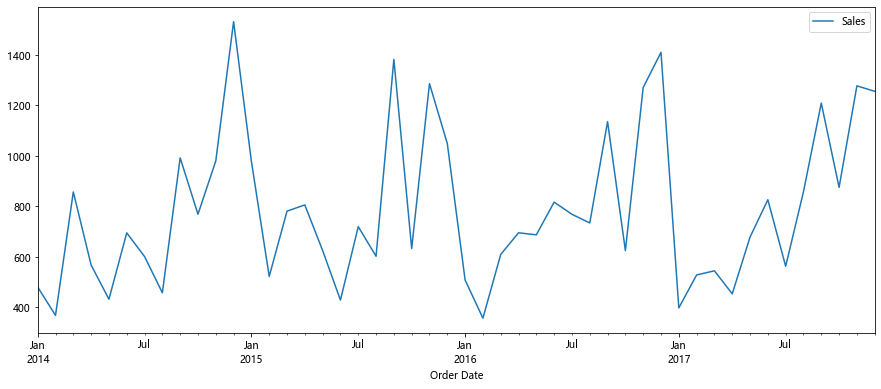

In [9]:
y.plot(figsize=(15, 6))
plt.show()

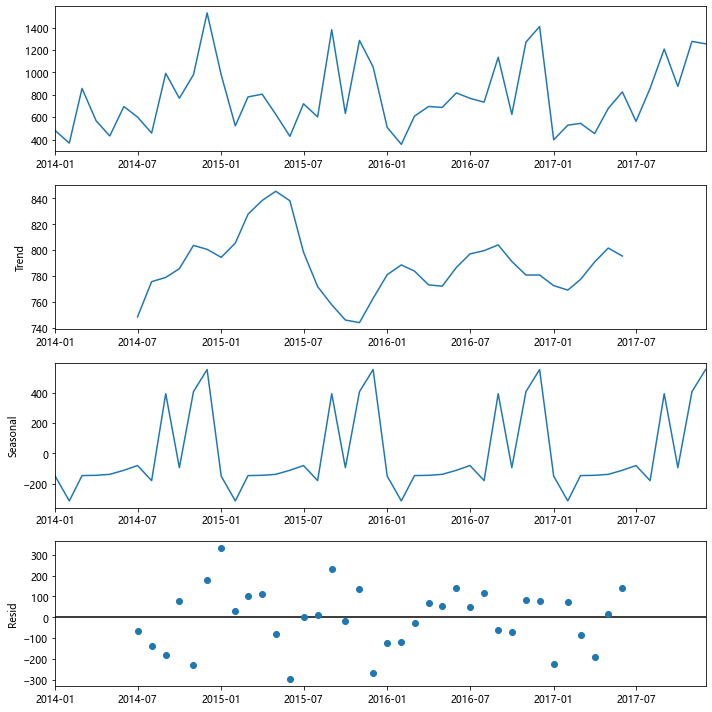

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(y)
plt.rcParams.update({'figure.figsize': (10, 10)})
result.plot()  # 这个是时间序列专有函数,里面的参数为需要绘制的图像,默认全是True
plt.show()

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

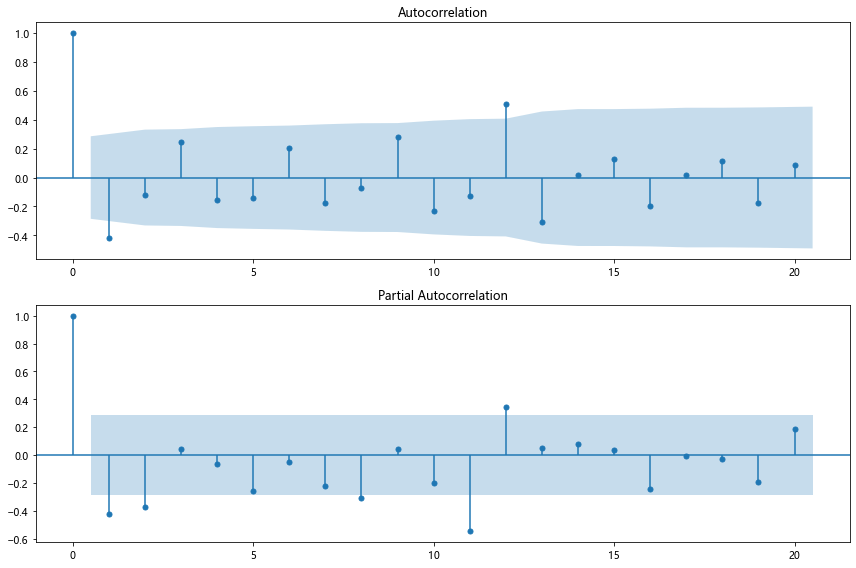

In [14]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(y.diff()[1:], lags=20, ax=ax1)  # lags就是横轴画多少个
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = plot_pacf(y.diff()[1:], lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

plt.show()

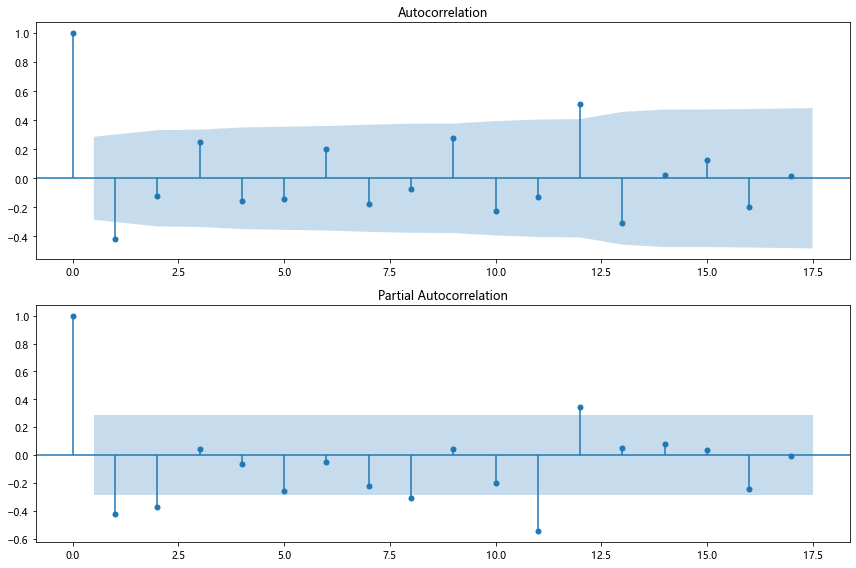

In [13]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(y.diff()[1:], ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = plot_pacf(y.diff()[1:], ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

plt.show()

<Figure size 864x576 with 0 Axes>

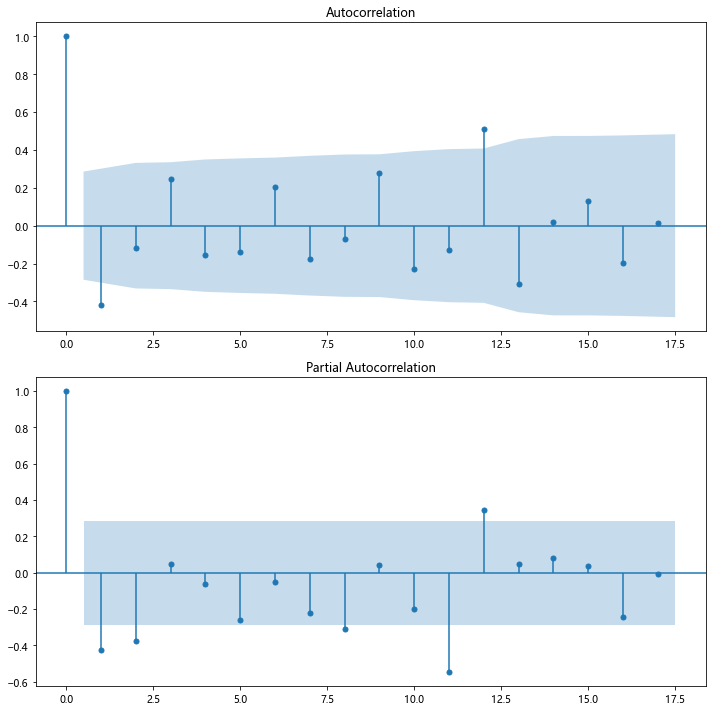

In [16]:
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 1)
plot_acf(y.diff()[1:], ax=axes[0])
axes[0].xaxis.set_ticks_position('bottom')
fig.tight_layout()

plot_pacf(y.diff()[1:], ax=axes[1])
axes[1].xaxis.set_ticks_position('bottom')
fig.tight_layout()

plt.show()

In [17]:
import itertools

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [19]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in  pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [32]:
best_param = ()
min_aic = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                        seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibity=False)
        results = mod.fit()
        if min_aic == 0:
            min_aic = results.aic
        elif results.aic <= min_aic:
            best_param = (param, param_seasonal)
            min_aic = results.aic
        
print(f"最优参数pdq:{best_param}, 最佳aic:{min_aic}")


最优参数pdq:((0, 1, 1), (0, 1, 1, 12)), 最佳aic:279.5801888359552


In [64]:
mod = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), 
                               season_order=(0, 1, 1, 12), 
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -322.953
Date:                Mon, 14 Nov 2022   AIC                            649.906
Time:                        19:47:33   BIC                            653.519
Sample:                    01-01-2014   HQIC                           651.253
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9493      0.113     -8.371      0.000      -1.172      -0.727
sigma2      9.667e+04   2.02e+04      4.796      0.000    5.72e+04    1.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.15   Prob(JB):                         0.23
Heteroskedasticity (H):               1.41   Skew:                             0.59
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

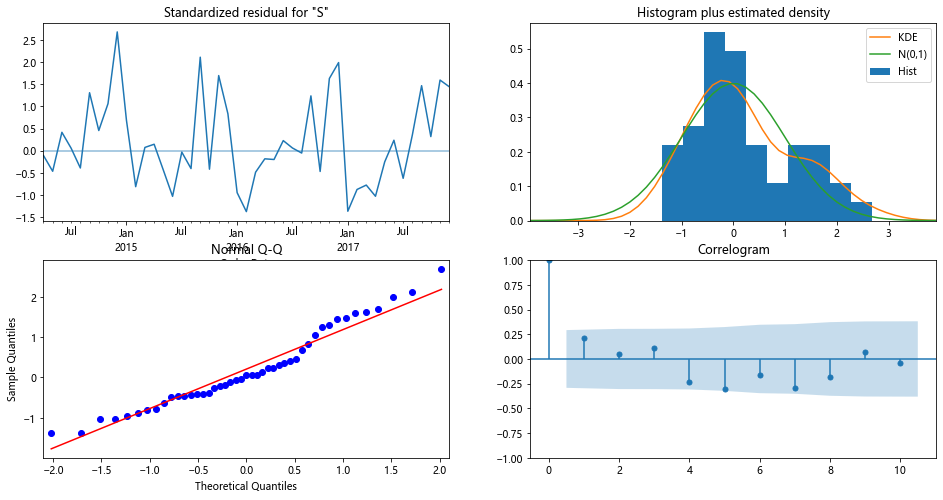

In [65]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

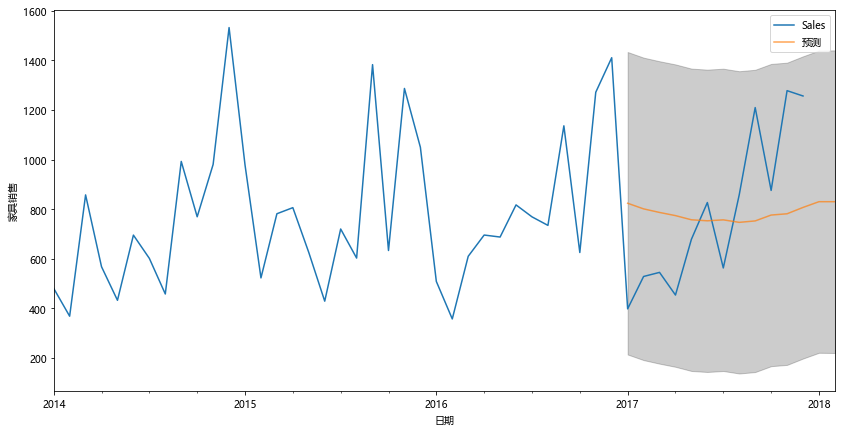

In [66]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),
                              end=pd.to_datetime('2018-02-01'))
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='真实值')
pred.predicted_mean.plot(ax=ax, label='预测', alpha=0.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('日期')
ax.set_ylabel('家具销售')
plt.legend()
plt.show()

In [56]:
y['2014']

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [53]:
pred.predicted_mean

Order Date
2017-01-01    823.583095
2017-02-01    800.914199
2017-03-01    786.468996
2017-04-01    773.716916
2017-05-01    756.883244
2017-06-01    752.769163
2017-07-01    756.615212
2017-08-01    746.513814
2017-09-01    752.295267
2017-10-01    775.976412
2017-11-01    781.113490
2017-12-01    806.739530
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
y

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367
